# 在網路加上正則向

In [2]:
import numpy as np
import tensorflow as tf
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]
    
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))
#        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01))

        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dense2(x)          # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

num_epochs = 5
batch_size = 50
learning_rate = 0.001

model = MLP()
data_loader = MNISTLoader()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
for batch_index in range(num_batches):
    X, y = data_loader.get_batch(batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = model.predict(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

batch 0: loss 2.355628
batch 1: loss 2.182877
batch 2: loss 2.110263
batch 3: loss 2.015832
batch 4: loss 1.922021
batch 5: loss 1.978993
batch 6: loss 2.069015
batch 7: loss 1.865456
batch 8: loss 1.859898
batch 9: loss 1.712597
batch 10: loss 1.659049
batch 11: loss 1.665439
batch 12: loss 1.547476
batch 13: loss 1.508293
batch 14: loss 1.659315
batch 15: loss 1.489922
batch 16: loss 1.312801
batch 17: loss 1.291167
batch 18: loss 1.151451
batch 19: loss 1.298414
batch 20: loss 1.188966
batch 21: loss 1.162551
batch 22: loss 1.093741
batch 23: loss 1.136553
batch 24: loss 1.126664
batch 25: loss 0.899033
batch 26: loss 1.176222
batch 27: loss 0.872691
batch 28: loss 0.983082
batch 29: loss 0.858800
batch 30: loss 0.971009
batch 31: loss 0.811347
batch 32: loss 0.705345
batch 33: loss 0.935347
batch 34: loss 0.716346
batch 35: loss 0.925834
batch 36: loss 0.683442
batch 37: loss 0.670496
batch 38: loss 0.636420
batch 39: loss 0.765775
batch 40: loss 0.751668
batch 41: loss 0.574440
ba

batch 361: loss 0.198288
batch 362: loss 0.204222
batch 363: loss 0.392609
batch 364: loss 0.429585
batch 365: loss 0.207812
batch 366: loss 0.226282
batch 367: loss 0.233647
batch 368: loss 0.177145
batch 369: loss 0.228648
batch 370: loss 0.187268
batch 371: loss 0.309484
batch 372: loss 0.389968
batch 373: loss 0.276500
batch 374: loss 0.421231
batch 375: loss 0.351088
batch 376: loss 0.151322
batch 377: loss 0.282568
batch 378: loss 0.289130
batch 379: loss 0.185934
batch 380: loss 0.363021
batch 381: loss 0.185297
batch 382: loss 0.293696
batch 383: loss 0.150312
batch 384: loss 0.205409
batch 385: loss 0.243246
batch 386: loss 0.534251
batch 387: loss 0.147858
batch 388: loss 0.162614
batch 389: loss 0.196077
batch 390: loss 0.307716
batch 391: loss 0.150157
batch 392: loss 0.254154
batch 393: loss 0.180444
batch 394: loss 0.227422
batch 395: loss 0.280263
batch 396: loss 0.178001
batch 397: loss 0.208558
batch 398: loss 0.302002
batch 399: loss 0.179969
batch 400: loss 0.167273


batch 701: loss 0.078842
batch 702: loss 0.173240
batch 703: loss 0.220704
batch 704: loss 0.447445
batch 705: loss 0.111000
batch 706: loss 0.354454
batch 707: loss 0.204895
batch 708: loss 0.144724
batch 709: loss 0.081692
batch 710: loss 0.213199
batch 711: loss 0.231329
batch 712: loss 0.132877
batch 713: loss 0.281272
batch 714: loss 0.408756
batch 715: loss 0.168518
batch 716: loss 0.239556
batch 717: loss 0.130466
batch 718: loss 0.113562
batch 719: loss 0.361526
batch 720: loss 0.092073
batch 721: loss 0.111096
batch 722: loss 0.312562
batch 723: loss 0.159329
batch 724: loss 0.323645
batch 725: loss 0.093828
batch 726: loss 0.150611
batch 727: loss 0.222713
batch 728: loss 0.126348
batch 729: loss 0.213858
batch 730: loss 0.165899
batch 731: loss 0.102664
batch 732: loss 0.240372
batch 733: loss 0.041348
batch 734: loss 0.290801
batch 735: loss 0.173212
batch 736: loss 0.094161
batch 737: loss 0.395226
batch 738: loss 0.182474
batch 739: loss 0.194468
batch 740: loss 0.194869


batch 1067: loss 0.134571
batch 1068: loss 0.217119
batch 1069: loss 0.182993
batch 1070: loss 0.134819
batch 1071: loss 0.275676
batch 1072: loss 0.032868
batch 1073: loss 0.270422
batch 1074: loss 0.166943
batch 1075: loss 0.089149
batch 1076: loss 0.173658
batch 1077: loss 0.117611
batch 1078: loss 0.263426
batch 1079: loss 0.113881
batch 1080: loss 0.094509
batch 1081: loss 0.185416
batch 1082: loss 0.369902
batch 1083: loss 0.134503
batch 1084: loss 0.090664
batch 1085: loss 0.084974
batch 1086: loss 0.130885
batch 1087: loss 0.243194
batch 1088: loss 0.065666
batch 1089: loss 0.282935
batch 1090: loss 0.059518
batch 1091: loss 0.397819
batch 1092: loss 0.112928
batch 1093: loss 0.159376
batch 1094: loss 0.078019
batch 1095: loss 0.224094
batch 1096: loss 0.393412
batch 1097: loss 0.269618
batch 1098: loss 0.206974
batch 1099: loss 0.634742
batch 1100: loss 0.103223
batch 1101: loss 0.107710
batch 1102: loss 0.047399
batch 1103: loss 0.105512
batch 1104: loss 0.189481
batch 1105: 

batch 1411: loss 0.053276
batch 1412: loss 0.086477
batch 1413: loss 0.267957
batch 1414: loss 0.148571
batch 1415: loss 0.087308
batch 1416: loss 0.121278
batch 1417: loss 0.210576
batch 1418: loss 0.218443
batch 1419: loss 0.259052
batch 1420: loss 0.094896
batch 1421: loss 0.064542
batch 1422: loss 0.275740
batch 1423: loss 0.183538
batch 1424: loss 0.131137
batch 1425: loss 0.102233
batch 1426: loss 0.225624
batch 1427: loss 0.127284
batch 1428: loss 0.105332
batch 1429: loss 0.229272
batch 1430: loss 0.044808
batch 1431: loss 0.141671
batch 1432: loss 0.045562
batch 1433: loss 0.119901
batch 1434: loss 0.080404
batch 1435: loss 0.132061
batch 1436: loss 0.261130
batch 1437: loss 0.046229
batch 1438: loss 0.400458
batch 1439: loss 0.247831
batch 1440: loss 0.117507
batch 1441: loss 0.219576
batch 1442: loss 0.246362
batch 1443: loss 0.267738
batch 1444: loss 0.186810
batch 1445: loss 0.111919
batch 1446: loss 0.096704
batch 1447: loss 0.067791
batch 1448: loss 0.135071
batch 1449: 

batch 1745: loss 0.200638
batch 1746: loss 0.095865
batch 1747: loss 0.059877
batch 1748: loss 0.080962
batch 1749: loss 0.116163
batch 1750: loss 0.120429
batch 1751: loss 0.080854
batch 1752: loss 0.098912
batch 1753: loss 0.129841
batch 1754: loss 0.193209
batch 1755: loss 0.336082
batch 1756: loss 0.084969
batch 1757: loss 0.208545
batch 1758: loss 0.038920
batch 1759: loss 0.176589
batch 1760: loss 0.042646
batch 1761: loss 0.045145
batch 1762: loss 0.131183
batch 1763: loss 0.078262
batch 1764: loss 0.123118
batch 1765: loss 0.128311
batch 1766: loss 0.214126
batch 1767: loss 0.094980
batch 1768: loss 0.056668
batch 1769: loss 0.088236
batch 1770: loss 0.041018
batch 1771: loss 0.046241
batch 1772: loss 0.056153
batch 1773: loss 0.168603
batch 1774: loss 0.089199
batch 1775: loss 0.059297
batch 1776: loss 0.131241
batch 1777: loss 0.166587
batch 1778: loss 0.176661
batch 1779: loss 0.114837
batch 1780: loss 0.227022
batch 1781: loss 0.088265
batch 1782: loss 0.089389
batch 1783: 

batch 2092: loss 0.078894
batch 2093: loss 0.086149
batch 2094: loss 0.136060
batch 2095: loss 0.066341
batch 2096: loss 0.073639
batch 2097: loss 0.134368
batch 2098: loss 0.028928
batch 2099: loss 0.034954
batch 2100: loss 0.291795
batch 2101: loss 0.031101
batch 2102: loss 0.017809
batch 2103: loss 0.114474
batch 2104: loss 0.151301
batch 2105: loss 0.032342
batch 2106: loss 0.217680
batch 2107: loss 0.126201
batch 2108: loss 0.121448
batch 2109: loss 0.021626
batch 2110: loss 0.163116
batch 2111: loss 0.066725
batch 2112: loss 0.074153
batch 2113: loss 0.108764
batch 2114: loss 0.210369
batch 2115: loss 0.226893
batch 2116: loss 0.114991
batch 2117: loss 0.166502
batch 2118: loss 0.058992
batch 2119: loss 0.153011
batch 2120: loss 0.182712
batch 2121: loss 0.089573
batch 2122: loss 0.053213
batch 2123: loss 0.108049
batch 2124: loss 0.077180
batch 2125: loss 0.087246
batch 2126: loss 0.205444
batch 2127: loss 0.202767
batch 2128: loss 0.149517
batch 2129: loss 0.019549
batch 2130: 

batch 2426: loss 0.092342
batch 2427: loss 0.042075
batch 2428: loss 0.118304
batch 2429: loss 0.031642
batch 2430: loss 0.081528
batch 2431: loss 0.109851
batch 2432: loss 0.150151
batch 2433: loss 0.069280
batch 2434: loss 0.346908
batch 2435: loss 0.083859
batch 2436: loss 0.146617
batch 2437: loss 0.057186
batch 2438: loss 0.122216
batch 2439: loss 0.037322
batch 2440: loss 0.128428
batch 2441: loss 0.059479
batch 2442: loss 0.147311
batch 2443: loss 0.144581
batch 2444: loss 0.110834
batch 2445: loss 0.163967
batch 2446: loss 0.124461
batch 2447: loss 0.111820
batch 2448: loss 0.187663
batch 2449: loss 0.143985
batch 2450: loss 0.039973
batch 2451: loss 0.070139
batch 2452: loss 0.069986
batch 2453: loss 0.139983
batch 2454: loss 0.062261
batch 2455: loss 0.013478
batch 2456: loss 0.063562
batch 2457: loss 0.079477
batch 2458: loss 0.137453
batch 2459: loss 0.233212
batch 2460: loss 0.118460
batch 2461: loss 0.225574
batch 2462: loss 0.105603
batch 2463: loss 0.130811
batch 2464: 

batch 2766: loss 0.012767
batch 2767: loss 0.038075
batch 2768: loss 0.063535
batch 2769: loss 0.031152
batch 2770: loss 0.159058
batch 2771: loss 0.056965
batch 2772: loss 0.155945
batch 2773: loss 0.028515
batch 2774: loss 0.086616
batch 2775: loss 0.033096
batch 2776: loss 0.100445
batch 2777: loss 0.228410
batch 2778: loss 0.134527
batch 2779: loss 0.026589
batch 2780: loss 0.108853
batch 2781: loss 0.164948
batch 2782: loss 0.197621
batch 2783: loss 0.211598
batch 2784: loss 0.078119
batch 2785: loss 0.054689
batch 2786: loss 0.138103
batch 2787: loss 0.018633
batch 2788: loss 0.082666
batch 2789: loss 0.258701
batch 2790: loss 0.058435
batch 2791: loss 0.090804
batch 2792: loss 0.173138
batch 2793: loss 0.123597
batch 2794: loss 0.098430
batch 2795: loss 0.124684
batch 2796: loss 0.089875
batch 2797: loss 0.061262
batch 2798: loss 0.244196
batch 2799: loss 0.082091
batch 2800: loss 0.130923
batch 2801: loss 0.141149
batch 2802: loss 0.208882
batch 2803: loss 0.123651
batch 2804: 

batch 3098: loss 0.068820
batch 3099: loss 0.039196
batch 3100: loss 0.030294
batch 3101: loss 0.074461
batch 3102: loss 0.064643
batch 3103: loss 0.116151
batch 3104: loss 0.035986
batch 3105: loss 0.074147
batch 3106: loss 0.250962
batch 3107: loss 0.062614
batch 3108: loss 0.117857
batch 3109: loss 0.130425
batch 3110: loss 0.082339
batch 3111: loss 0.063900
batch 3112: loss 0.029177
batch 3113: loss 0.057164
batch 3114: loss 0.063341
batch 3115: loss 0.056770
batch 3116: loss 0.075559
batch 3117: loss 0.019764
batch 3118: loss 0.048118
batch 3119: loss 0.150343
batch 3120: loss 0.005146
batch 3121: loss 0.125943
batch 3122: loss 0.074121
batch 3123: loss 0.077855
batch 3124: loss 0.089128
batch 3125: loss 0.175243
batch 3126: loss 0.040726
batch 3127: loss 0.059753
batch 3128: loss 0.045760
batch 3129: loss 0.103126
batch 3130: loss 0.043852
batch 3131: loss 0.109908
batch 3132: loss 0.270958
batch 3133: loss 0.142520
batch 3134: loss 0.095833
batch 3135: loss 0.054855
batch 3136: 

batch 3438: loss 0.092016
batch 3439: loss 0.112044
batch 3440: loss 0.060249
batch 3441: loss 0.013812
batch 3442: loss 0.028046
batch 3443: loss 0.061894
batch 3444: loss 0.116213
batch 3445: loss 0.031280
batch 3446: loss 0.025860
batch 3447: loss 0.030440
batch 3448: loss 0.079613
batch 3449: loss 0.038523
batch 3450: loss 0.103243
batch 3451: loss 0.031568
batch 3452: loss 0.181674
batch 3453: loss 0.109747
batch 3454: loss 0.115662
batch 3455: loss 0.036017
batch 3456: loss 0.049928
batch 3457: loss 0.060049
batch 3458: loss 0.062487
batch 3459: loss 0.009641
batch 3460: loss 0.051450
batch 3461: loss 0.019149
batch 3462: loss 0.020679
batch 3463: loss 0.023090
batch 3464: loss 0.023732
batch 3465: loss 0.023922
batch 3466: loss 0.111149
batch 3467: loss 0.043209
batch 3468: loss 0.132074
batch 3469: loss 0.076362
batch 3470: loss 0.088863
batch 3471: loss 0.059402
batch 3472: loss 0.197303
batch 3473: loss 0.037307
batch 3474: loss 0.091858
batch 3475: loss 0.034278
batch 3476: 

batch 4105: loss 0.117547
batch 4106: loss 0.107104
batch 4107: loss 0.128382
batch 4108: loss 0.009036
batch 4109: loss 0.181404
batch 4110: loss 0.052840
batch 4111: loss 0.079171
batch 4112: loss 0.087171
batch 4113: loss 0.029150
batch 4114: loss 0.010346
batch 4115: loss 0.052717
batch 4116: loss 0.122202
batch 4117: loss 0.018406
batch 4118: loss 0.099968
batch 4119: loss 0.128224
batch 4120: loss 0.292793
batch 4121: loss 0.014528
batch 4122: loss 0.039510
batch 4123: loss 0.103933
batch 4124: loss 0.051691
batch 4125: loss 0.013796
batch 4126: loss 0.111367
batch 4127: loss 0.032550
batch 4128: loss 0.046131
batch 4129: loss 0.039387
batch 4130: loss 0.075228
batch 4131: loss 0.025649
batch 4132: loss 0.120380
batch 4133: loss 0.141569
batch 4134: loss 0.015871
batch 4135: loss 0.015195
batch 4136: loss 0.033848
batch 4137: loss 0.076257
batch 4138: loss 0.077486
batch 4139: loss 0.024437
batch 4140: loss 0.069400
batch 4141: loss 0.014867
batch 4142: loss 0.014484
batch 4143: 

batch 4426: loss 0.018541
batch 4427: loss 0.028238
batch 4428: loss 0.065711
batch 4429: loss 0.039669
batch 4430: loss 0.034379
batch 4431: loss 0.110205
batch 4432: loss 0.031028
batch 4433: loss 0.034371
batch 4434: loss 0.011023
batch 4435: loss 0.198900
batch 4436: loss 0.025627
batch 4437: loss 0.017472
batch 4438: loss 0.030237
batch 4439: loss 0.044060
batch 4440: loss 0.065467
batch 4441: loss 0.014894
batch 4442: loss 0.028347
batch 4443: loss 0.038167
batch 4444: loss 0.174668
batch 4445: loss 0.101232
batch 4446: loss 0.020385
batch 4447: loss 0.061920
batch 4448: loss 0.029190
batch 4449: loss 0.028631
batch 4450: loss 0.078042
batch 4451: loss 0.030350
batch 4452: loss 0.193013
batch 4453: loss 0.015187
batch 4454: loss 0.091566
batch 4455: loss 0.057570
batch 4456: loss 0.013041
batch 4457: loss 0.304340
batch 4458: loss 0.022265
batch 4459: loss 0.087147
batch 4460: loss 0.056082
batch 4461: loss 0.169133
batch 4462: loss 0.022505
batch 4463: loss 0.019409
batch 4464: 

batch 4753: loss 0.020653
batch 4754: loss 0.083181
batch 4755: loss 0.010909
batch 4756: loss 0.043500
batch 4757: loss 0.066022
batch 4758: loss 0.022486
batch 4759: loss 0.267442
batch 4760: loss 0.102723
batch 4761: loss 0.145377
batch 4762: loss 0.053585
batch 4763: loss 0.029102
batch 4764: loss 0.090092
batch 4765: loss 0.049719
batch 4766: loss 0.022748
batch 4767: loss 0.039745
batch 4768: loss 0.059553
batch 4769: loss 0.025978
batch 4770: loss 0.023191
batch 4771: loss 0.079260
batch 4772: loss 0.062416
batch 4773: loss 0.012795
batch 4774: loss 0.018660
batch 4775: loss 0.311953
batch 4776: loss 0.056313
batch 4777: loss 0.032010
batch 4778: loss 0.081163
batch 4779: loss 0.092005
batch 4780: loss 0.018106
batch 4781: loss 0.011809
batch 4782: loss 0.044611
batch 4783: loss 0.083163
batch 4784: loss 0.008340
batch 4785: loss 0.083408
batch 4786: loss 0.126669
batch 4787: loss 0.012945
batch 4788: loss 0.052477
batch 4789: loss 0.031824
batch 4790: loss 0.011815
batch 4791: 

batch 5098: loss 0.068797
batch 5099: loss 0.044556
batch 5100: loss 0.150175
batch 5101: loss 0.033028
batch 5102: loss 0.057800
batch 5103: loss 0.040591
batch 5104: loss 0.033216
batch 5105: loss 0.064875
batch 5106: loss 0.023333
batch 5107: loss 0.024097
batch 5108: loss 0.041645
batch 5109: loss 0.015214
batch 5110: loss 0.023347
batch 5111: loss 0.015303
batch 5112: loss 0.040533
batch 5113: loss 0.073789
batch 5114: loss 0.027309
batch 5115: loss 0.028070
batch 5116: loss 0.178180
batch 5117: loss 0.019393
batch 5118: loss 0.016328
batch 5119: loss 0.026753
batch 5120: loss 0.016176
batch 5121: loss 0.019594
batch 5122: loss 0.086949
batch 5123: loss 0.014113
batch 5124: loss 0.106383
batch 5125: loss 0.024899
batch 5126: loss 0.063764
batch 5127: loss 0.015309
batch 5128: loss 0.020666
batch 5129: loss 0.051349
batch 5130: loss 0.006751
batch 5131: loss 0.142402
batch 5132: loss 0.032188
batch 5133: loss 0.022839
batch 5134: loss 0.029800
batch 5135: loss 0.070172
batch 5136: 

batch 5434: loss 0.005399
batch 5435: loss 0.140274
batch 5436: loss 0.040588
batch 5437: loss 0.130424
batch 5438: loss 0.020335
batch 5439: loss 0.005546
batch 5440: loss 0.026691
batch 5441: loss 0.028415
batch 5442: loss 0.072437
batch 5443: loss 0.042467
batch 5444: loss 0.036198
batch 5445: loss 0.015582
batch 5446: loss 0.016076
batch 5447: loss 0.038996
batch 5448: loss 0.075612
batch 5449: loss 0.032558
batch 5450: loss 0.036463
batch 5451: loss 0.081481
batch 5452: loss 0.023301
batch 5453: loss 0.024229
batch 5454: loss 0.122796
batch 5455: loss 0.009106
batch 5456: loss 0.033761
batch 5457: loss 0.119223
batch 5458: loss 0.012178
batch 5459: loss 0.049769
batch 5460: loss 0.022803
batch 5461: loss 0.049132
batch 5462: loss 0.037522
batch 5463: loss 0.034101
batch 5464: loss 0.060980
batch 5465: loss 0.098946
batch 5466: loss 0.083074
batch 5467: loss 0.015809
batch 5468: loss 0.166464
batch 5469: loss 0.258132
batch 5470: loss 0.048449
batch 5471: loss 0.249369
batch 5472: 

batch 5777: loss 0.104267
batch 5778: loss 0.119306
batch 5779: loss 0.129082
batch 5780: loss 0.028040
batch 5781: loss 0.145208
batch 5782: loss 0.037131
batch 5783: loss 0.073354
batch 5784: loss 0.078038
batch 5785: loss 0.065277
batch 5786: loss 0.071798
batch 5787: loss 0.083576
batch 5788: loss 0.069607
batch 5789: loss 0.031996
batch 5790: loss 0.032126
batch 5791: loss 0.084191
batch 5792: loss 0.016723
batch 5793: loss 0.038692
batch 5794: loss 0.026809
batch 5795: loss 0.070674
batch 5796: loss 0.010927
batch 5797: loss 0.033127
batch 5798: loss 0.011371
batch 5799: loss 0.013495
batch 5800: loss 0.027510
batch 5801: loss 0.064980
batch 5802: loss 0.028854
batch 5803: loss 0.031969
batch 5804: loss 0.029882
batch 5805: loss 0.009789
batch 5806: loss 0.047843
batch 5807: loss 0.071522
batch 5808: loss 0.025624
batch 5809: loss 0.035372
batch 5810: loss 0.016835
batch 5811: loss 0.049969
batch 5812: loss 0.017545
batch 5813: loss 0.033383
batch 5814: loss 0.209501
batch 5815: 

# 在網路加上正則向(keras版本)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01))
])


#keras.optimizers.Adagrad(learning_rate=0.01)
#keras.optimizers.Adam(learning_rate=0.01)
#keras.optimizers.RMSprop(learning_rate=0.01)

# provide labels as one_hot representation => tf.keras.losses.CategoricalCrossentropy
# provide labels as integers => tf.keras.losses.SparseCategoricalCrossentropy 
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)



(60000, 784)   (60000,)
(10000, 784)   (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
165/165 - 1s - loss: 12.2978 - accuracy: 0.7207 - val_loss: 8.7443 - val_accuracy: 0.8365
Epoch 2/100
165/165 - 0s - loss: 7.6594 - accuracy: 0.8703 - val_loss: 6.6998 - val_accuracy: 0.8843

Epoch 73/100
165/165 - 0s - loss: 0.1534 - accuracy: 0.9919 - val_loss: 0.2581 - val_accuracy: 0.9629
Epoch 74/100
165/165 - 0s - loss: 0.1551 - accuracy: 0.9912 - val_loss: 0.2589 - val_accuracy: 0.9622
Epoch 75/100
165/165 - 0s - loss: 0.1487 - accuracy: 0.9934 - val_loss: 0.2579 - val_accuracy: 0.9615
Epoch 76/100
165/165 - 0s - loss: 0.1489 - accuracy: 0.9935 - val_loss: 0.2527 - val_accuracy: 0.9641
Epoch 77/100
165/165 - 0s - loss: 0.1484 - accuracy: 0.9932 - val_loss: 0.2556 - val_accuracy: 0.9634
Epoch 78/100
165/165 - 0s - loss: 0.1466 - accuracy: 0.9936 - val_loss: 0.2589 - val_accuracy: 0.9614
Epoch 79/100
165/165 - 0s - loss: 0.1480 - accuracy: 0.9930 - val_loss: 0.2570 - val_accuracy: 0.9638
Epoch 80/100
165/165 - 0s - loss: 0.1487 - accuracy: 0.9932 - val_loss: 0.2500 - val_accuracy: 0.9647
Epoch 81/100
165/165 - 0s - loss: 0.1444 - accuracy: 0.9940 - val_loss: 0.2581 - val_accuracy: 0.9612
Epoch 82/100
165/165 - 0s - loss: 0.1447 - accuracy: 0.9945 - val_loss: 0.2508 - v

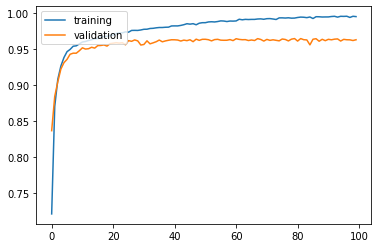

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [5]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 0s 623us/step - loss: 0.2380 - accuracy: 0.9659
[0.23797090351581573, 0.9659000039100647]


# 在網路加上Dropout

In [6]:
import numpy as np
import tensorflow as tf
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]
    
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()    # Flatten层将除第一维（batch_size）以外的维度展平
        self.dense1 = tf.keras.layers.Dense(units=100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))
        self.dense2 = tf.keras.layers.Dense(units=10)
        self.dropout_layer = tf.keras.layers.Dropout(rate=0.2)
        self.tra
    def call(self, inputs, training=None):         # [batch_size, 28, 28, 1]
        x = self.flatten(inputs)    # [batch_size, 784]
        x = self.dense1(x)          # [batch_size, 100]
        x = self.dropout_layer(x, training=self.training)
        x = self.dense2(x)          # [batch_size, 10]
        x = self.dropout_layer(x, training=self.training)
        output = tf.nn.softmax(x)
        return output

num_epochs = 5
batch_size = 50
learning_rate = 0.001

model = MLP(training=True)
data_loader = MNISTLoader()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
for batch_index in range(num_batches):
    X, y = data_loader.get_batch(batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    
    
# build a clone of the model with dropouts deactivated in test phase
test_model = MLP(training=False)
# transfer the weights from the trained model to this model
test_model.set_weights(model.get_weights())


sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = test_model.predict(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

batch 0: loss 2.498419
batch 1: loss 2.635604
batch 2: loss 2.407203
batch 3: loss 2.214640
batch 4: loss 2.261443
batch 5: loss 2.198328
batch 6: loss 1.999668
batch 7: loss 1.995966
batch 8: loss 1.993903
batch 9: loss 1.906288
batch 10: loss 1.853575
batch 11: loss 1.915547
batch 12: loss 1.831369
batch 13: loss 1.763740
batch 14: loss 1.800135
batch 15: loss 1.722186
batch 16: loss 1.822513
batch 17: loss 1.602395
batch 18: loss 1.722422
batch 19: loss 1.676798
batch 20: loss 1.475105
batch 21: loss 1.377925
batch 22: loss 1.504978
batch 23: loss 1.517743
batch 24: loss 1.373024
batch 25: loss 1.239873
batch 26: loss 1.572929
batch 27: loss 1.432106
batch 28: loss 1.619348
batch 29: loss 1.174587
batch 30: loss 1.073669
batch 31: loss 1.465997
batch 32: loss 1.255353
batch 33: loss 1.155795
batch 34: loss 1.296609
batch 35: loss 1.073558
batch 36: loss 1.336342
batch 37: loss 1.267272
batch 38: loss 1.178755
batch 39: loss 1.001333
batch 40: loss 0.997519
batch 41: loss 1.056225
ba

batch 359: loss 0.406115
batch 360: loss 0.566716
batch 361: loss 0.572099
batch 362: loss 0.742430
batch 363: loss 0.569983
batch 364: loss 0.572757
batch 365: loss 0.513316
batch 366: loss 0.641713
batch 367: loss 0.361921
batch 368: loss 0.698060
batch 369: loss 0.719322
batch 370: loss 0.525427
batch 371: loss 0.580642
batch 372: loss 0.542786
batch 373: loss 0.649420
batch 374: loss 0.587308
batch 375: loss 0.479136
batch 376: loss 0.478934
batch 377: loss 0.497809
batch 378: loss 0.309522
batch 379: loss 0.764512
batch 380: loss 0.612215
batch 381: loss 0.620390
batch 382: loss 0.545985
batch 383: loss 0.534761
batch 384: loss 0.742777
batch 385: loss 0.560495
batch 386: loss 0.526278
batch 387: loss 0.428880
batch 388: loss 0.693090
batch 389: loss 0.465271
batch 390: loss 0.373078
batch 391: loss 0.583335
batch 392: loss 0.513403
batch 393: loss 0.507378
batch 394: loss 0.461447
batch 395: loss 0.686804
batch 396: loss 0.498673
batch 397: loss 0.413858
batch 398: loss 0.678915


batch 708: loss 0.528945
batch 709: loss 0.430981
batch 710: loss 0.439774
batch 711: loss 0.402829
batch 712: loss 0.497018
batch 713: loss 0.657941
batch 714: loss 0.399706
batch 715: loss 0.345701
batch 716: loss 0.284940
batch 717: loss 0.516705
batch 718: loss 0.443770
batch 719: loss 0.463060
batch 720: loss 0.765259
batch 721: loss 0.496383
batch 722: loss 0.529534
batch 723: loss 0.526521
batch 724: loss 0.852631
batch 725: loss 0.486209
batch 726: loss 0.442862
batch 727: loss 0.495100
batch 728: loss 0.572288
batch 729: loss 0.607890
batch 730: loss 0.253955
batch 731: loss 0.555694
batch 732: loss 0.562818
batch 733: loss 0.336219
batch 734: loss 0.623113
batch 735: loss 0.506338
batch 736: loss 0.417890
batch 737: loss 0.605502
batch 738: loss 0.519231
batch 739: loss 0.619505
batch 740: loss 0.563615
batch 741: loss 0.739717
batch 742: loss 0.479301
batch 743: loss 0.380317
batch 744: loss 0.731291
batch 745: loss 0.393382
batch 746: loss 0.564103
batch 747: loss 0.476700


batch 1045: loss 0.414347
batch 1046: loss 0.648935
batch 1047: loss 0.386628
batch 1048: loss 0.419186
batch 1049: loss 0.438937
batch 1050: loss 0.552920
batch 1051: loss 0.396171
batch 1052: loss 0.610090
batch 1053: loss 0.369565
batch 1054: loss 0.432931
batch 1055: loss 0.491226
batch 1056: loss 0.239867
batch 1057: loss 0.611416
batch 1058: loss 0.571295
batch 1059: loss 0.374221
batch 1060: loss 0.388975
batch 1061: loss 0.526509
batch 1062: loss 0.422878
batch 1063: loss 0.392288
batch 1064: loss 0.295494
batch 1065: loss 0.606242
batch 1066: loss 0.299090
batch 1067: loss 0.673192
batch 1068: loss 0.517196
batch 1069: loss 0.691572
batch 1070: loss 0.767054
batch 1071: loss 0.426581
batch 1072: loss 0.564476
batch 1073: loss 0.370820
batch 1074: loss 0.510492
batch 1075: loss 0.463874
batch 1076: loss 0.439214
batch 1077: loss 0.688979
batch 1078: loss 0.608888
batch 1079: loss 0.461749
batch 1080: loss 0.506123
batch 1081: loss 0.579458
batch 1082: loss 0.537320
batch 1083: 

batch 1366: loss 0.475459
batch 1367: loss 0.509099
batch 1368: loss 0.426686
batch 1369: loss 0.451097
batch 1370: loss 0.519520
batch 1371: loss 0.419101
batch 1372: loss 0.576564
batch 1373: loss 0.441977
batch 1374: loss 0.303445
batch 1375: loss 0.570960
batch 1376: loss 0.442122
batch 1377: loss 0.423163
batch 1378: loss 0.483543
batch 1379: loss 0.302292
batch 1380: loss 0.360143
batch 1381: loss 0.467584
batch 1382: loss 0.456898
batch 1383: loss 0.578029
batch 1384: loss 0.478360
batch 1385: loss 0.638917
batch 1386: loss 0.316761
batch 1387: loss 0.541755
batch 1388: loss 0.406918
batch 1389: loss 0.385403
batch 1390: loss 0.283261
batch 1391: loss 0.313505
batch 1392: loss 0.247930
batch 1393: loss 0.369552
batch 1394: loss 0.510989
batch 1395: loss 0.375022
batch 1396: loss 0.283947
batch 1397: loss 0.245324
batch 1398: loss 0.416421
batch 1399: loss 0.429556
batch 1400: loss 0.294875
batch 1401: loss 0.437991
batch 1402: loss 0.315348
batch 1403: loss 0.553218
batch 1404: 

batch 1692: loss 0.411267
batch 1693: loss 0.575654
batch 1694: loss 0.422794
batch 1695: loss 0.466459
batch 1696: loss 0.324839
batch 1697: loss 0.414568
batch 1698: loss 0.402268
batch 1699: loss 0.443381
batch 1700: loss 0.603955
batch 1701: loss 0.296736
batch 1702: loss 0.346278
batch 1703: loss 0.462573
batch 1704: loss 0.296320
batch 1705: loss 0.225401
batch 1706: loss 0.423946
batch 1707: loss 0.311364
batch 1708: loss 0.310355
batch 1709: loss 0.221539
batch 1710: loss 0.661283
batch 1711: loss 0.331966
batch 1712: loss 0.333495
batch 1713: loss 0.356812
batch 1714: loss 0.283094
batch 1715: loss 0.289634
batch 1716: loss 0.451053
batch 1717: loss 0.497461
batch 1718: loss 0.630391
batch 1719: loss 0.377442
batch 1720: loss 0.300124
batch 1721: loss 0.338912
batch 1722: loss 0.655747
batch 1723: loss 0.300997
batch 1724: loss 0.257950
batch 1725: loss 0.254861
batch 1726: loss 0.312760
batch 1727: loss 0.283360
batch 1728: loss 0.671471
batch 1729: loss 0.499702
batch 1730: 

batch 2019: loss 0.375340
batch 2020: loss 0.309619
batch 2021: loss 0.353147
batch 2022: loss 0.313131
batch 2023: loss 0.395520
batch 2024: loss 0.401397
batch 2025: loss 0.426099
batch 2026: loss 0.230515
batch 2027: loss 0.489360
batch 2028: loss 0.336970
batch 2029: loss 0.377183
batch 2030: loss 0.430129
batch 2031: loss 0.348536
batch 2032: loss 0.205603
batch 2033: loss 0.512012
batch 2034: loss 0.402339
batch 2035: loss 0.401757
batch 2036: loss 0.586729
batch 2037: loss 0.497157
batch 2038: loss 0.351865
batch 2039: loss 0.268479
batch 2040: loss 0.465948
batch 2041: loss 0.447223
batch 2042: loss 0.313272
batch 2043: loss 0.397131
batch 2044: loss 0.452703
batch 2045: loss 0.510491
batch 2046: loss 0.305883
batch 2047: loss 0.367272
batch 2048: loss 0.366562
batch 2049: loss 0.371648
batch 2050: loss 0.306750
batch 2051: loss 0.318003
batch 2052: loss 0.315848
batch 2053: loss 0.501045
batch 2054: loss 0.350377
batch 2055: loss 0.486145
batch 2056: loss 0.543847
batch 2057: 

batch 2346: loss 0.264437
batch 2347: loss 0.238391
batch 2348: loss 0.238617
batch 2349: loss 0.579527
batch 2350: loss 0.369271
batch 2351: loss 0.272259
batch 2352: loss 0.497437
batch 2353: loss 0.320397
batch 2354: loss 0.293907
batch 2355: loss 0.355812
batch 2356: loss 0.398644
batch 2357: loss 0.436400
batch 2358: loss 0.550273
batch 2359: loss 0.287784
batch 2360: loss 0.319919
batch 2361: loss 0.398564
batch 2362: loss 0.455481
batch 2363: loss 0.491780
batch 2364: loss 0.309706
batch 2365: loss 0.247118
batch 2366: loss 0.335454
batch 2367: loss 0.380809
batch 2368: loss 0.299922
batch 2369: loss 0.371437
batch 2370: loss 0.445149
batch 2371: loss 0.335687
batch 2372: loss 0.333688
batch 2373: loss 0.384285
batch 2374: loss 0.456100
batch 2375: loss 0.391714
batch 2376: loss 0.393422
batch 2377: loss 0.469480
batch 2378: loss 0.687497
batch 2379: loss 0.342347
batch 2380: loss 0.373468
batch 2381: loss 0.393066
batch 2382: loss 0.379462
batch 2383: loss 0.187236
batch 2384: 

batch 2674: loss 0.556553
batch 2675: loss 0.253723
batch 2676: loss 0.376422
batch 2677: loss 0.392447
batch 2678: loss 0.490783
batch 2679: loss 0.419489
batch 2680: loss 0.375210
batch 2681: loss 0.344524
batch 2682: loss 0.259367
batch 2683: loss 0.207390
batch 2684: loss 0.431722
batch 2685: loss 0.267513
batch 2686: loss 0.508803
batch 2687: loss 0.449236
batch 2688: loss 0.346929
batch 2689: loss 0.575158
batch 2690: loss 0.320318
batch 2691: loss 0.560883
batch 2692: loss 0.391922
batch 2693: loss 0.376321
batch 2694: loss 0.501416
batch 2695: loss 0.400498
batch 2696: loss 0.315333
batch 2697: loss 0.403015
batch 2698: loss 0.354772
batch 2699: loss 0.335109
batch 2700: loss 0.262013
batch 2701: loss 0.243106
batch 2702: loss 0.303485
batch 2703: loss 0.381383
batch 2704: loss 0.373259
batch 2705: loss 0.394926
batch 2706: loss 0.612809
batch 2707: loss 0.244523
batch 2708: loss 0.263420
batch 2709: loss 0.418025
batch 2710: loss 0.259016
batch 2711: loss 0.558447
batch 2712: 

batch 3004: loss 0.400091
batch 3005: loss 0.484235
batch 3006: loss 0.404848
batch 3007: loss 0.286362
batch 3008: loss 0.544197
batch 3009: loss 0.490992
batch 3010: loss 0.400302
batch 3011: loss 0.362882
batch 3012: loss 0.365509
batch 3013: loss 0.363534
batch 3014: loss 0.275295
batch 3015: loss 0.287581
batch 3016: loss 0.396903
batch 3017: loss 0.232858
batch 3018: loss 0.370770
batch 3019: loss 0.264029
batch 3020: loss 0.360515
batch 3021: loss 0.430296
batch 3022: loss 0.260256
batch 3023: loss 0.443988
batch 3024: loss 0.488968
batch 3025: loss 0.507089
batch 3026: loss 0.398496
batch 3027: loss 0.394489
batch 3028: loss 0.414014
batch 3029: loss 0.431725
batch 3030: loss 0.292123
batch 3031: loss 0.434382
batch 3032: loss 0.371169
batch 3033: loss 0.321883
batch 3034: loss 0.418642
batch 3035: loss 0.242601
batch 3036: loss 0.489504
batch 3037: loss 0.231808
batch 3038: loss 0.288003
batch 3039: loss 0.307887
batch 3040: loss 0.451149
batch 3041: loss 0.630944
batch 3042: 

batch 3343: loss 0.190121
batch 3344: loss 0.510209
batch 3345: loss 0.355574
batch 3346: loss 0.285199
batch 3347: loss 0.346809
batch 3348: loss 0.258272
batch 3349: loss 0.346934
batch 3350: loss 0.457260
batch 3351: loss 0.499169
batch 3352: loss 0.146534
batch 3353: loss 0.663676
batch 3354: loss 0.442636
batch 3355: loss 0.215107
batch 3356: loss 0.290177
batch 3357: loss 0.437650
batch 3358: loss 0.335038
batch 3359: loss 0.373917
batch 3360: loss 0.327038
batch 3361: loss 0.341715
batch 3362: loss 0.350452
batch 3363: loss 0.208342
batch 3364: loss 0.312156
batch 3365: loss 0.361146
batch 3366: loss 0.476161
batch 3367: loss 0.301190
batch 3368: loss 0.203891
batch 3369: loss 0.290733
batch 3370: loss 0.542623
batch 3371: loss 0.476892
batch 3372: loss 0.319938
batch 3373: loss 0.418613
batch 3374: loss 0.358793
batch 3375: loss 0.327057
batch 3376: loss 0.440664
batch 3377: loss 0.413186
batch 3378: loss 0.481915
batch 3379: loss 0.442701
batch 3380: loss 0.289548
batch 3381: 

batch 3681: loss 0.433408
batch 3682: loss 0.420029
batch 3683: loss 0.472867
batch 3684: loss 0.408813
batch 3685: loss 0.419656
batch 3686: loss 0.237501
batch 3687: loss 0.507588
batch 3688: loss 0.228639
batch 3689: loss 0.353176
batch 3690: loss 0.504173
batch 3691: loss 0.690427
batch 3692: loss 0.342922
batch 3693: loss 0.209017
batch 3694: loss 0.395219
batch 3695: loss 0.339000
batch 3696: loss 0.522704
batch 3697: loss 0.190564
batch 3698: loss 0.295706
batch 3699: loss 0.525822
batch 3700: loss 0.278535
batch 3701: loss 0.347683
batch 3702: loss 0.289428
batch 3703: loss 0.484333
batch 3704: loss 0.319754
batch 3705: loss 0.387650
batch 3706: loss 0.424171
batch 3707: loss 0.422857
batch 3708: loss 0.467896
batch 3709: loss 0.525025
batch 3710: loss 0.348661
batch 3711: loss 0.433948
batch 3712: loss 0.497373
batch 3713: loss 0.177104
batch 3714: loss 0.403365
batch 3715: loss 0.386632
batch 3716: loss 0.280438
batch 3717: loss 0.438653
batch 3718: loss 0.273628
batch 3719: 

batch 3998: loss 0.313370
batch 3999: loss 0.286129
batch 4000: loss 0.308772
batch 4001: loss 0.269822
batch 4002: loss 0.253977
batch 4003: loss 0.185759
batch 4004: loss 0.320629
batch 4005: loss 0.348682
batch 4006: loss 0.324272
batch 4007: loss 0.363078
batch 4008: loss 0.229351
batch 4009: loss 0.301746
batch 4010: loss 0.424591
batch 4011: loss 0.177785
batch 4012: loss 0.386351
batch 4013: loss 0.263561
batch 4014: loss 0.244472
batch 4015: loss 0.413026
batch 4016: loss 0.538065
batch 4017: loss 0.366936
batch 4018: loss 0.224314
batch 4019: loss 0.301881
batch 4020: loss 0.290309
batch 4021: loss 0.387533
batch 4022: loss 0.361675
batch 4023: loss 0.371511
batch 4024: loss 0.376935
batch 4025: loss 0.309438
batch 4026: loss 0.261034
batch 4027: loss 0.329258
batch 4028: loss 0.422308
batch 4029: loss 0.279675
batch 4030: loss 0.468174
batch 4031: loss 0.276528
batch 4032: loss 0.435355
batch 4033: loss 0.338777
batch 4034: loss 0.295423
batch 4035: loss 0.264033
batch 4036: 

batch 4329: loss 0.534869
batch 4330: loss 0.364586
batch 4331: loss 0.314240
batch 4332: loss 0.318916
batch 4333: loss 0.579276
batch 4334: loss 0.267886
batch 4335: loss 0.309612
batch 4336: loss 0.356897
batch 4337: loss 0.212487
batch 4338: loss 0.238795
batch 4339: loss 0.303732
batch 4340: loss 0.274833
batch 4341: loss 0.472182
batch 4342: loss 0.220212
batch 4343: loss 0.341749
batch 4344: loss 0.360059
batch 4345: loss 0.149715
batch 4346: loss 0.182361
batch 4347: loss 0.366923
batch 4348: loss 0.328959
batch 4349: loss 0.389874
batch 4350: loss 0.362405
batch 4351: loss 0.366468
batch 4352: loss 0.246260
batch 4353: loss 0.270007
batch 4354: loss 0.267604
batch 4355: loss 0.187567
batch 4356: loss 0.490375
batch 4357: loss 0.206403
batch 4358: loss 0.277616
batch 4359: loss 0.359171
batch 4360: loss 0.311151
batch 4361: loss 0.298635
batch 4362: loss 0.441447
batch 4363: loss 0.291793
batch 4364: loss 0.271640
batch 4365: loss 0.471473
batch 4366: loss 0.309472
batch 4367: 

batch 4649: loss 0.344619
batch 4650: loss 0.355773
batch 4651: loss 0.193928
batch 4652: loss 0.302872
batch 4653: loss 0.574316
batch 4654: loss 0.407967
batch 4655: loss 0.223194
batch 4656: loss 0.380764
batch 4657: loss 0.303605
batch 4658: loss 0.188167
batch 4659: loss 0.433320
batch 4660: loss 0.298572
batch 4661: loss 0.416831
batch 4662: loss 0.382791
batch 4663: loss 0.268535
batch 4664: loss 0.309056
batch 4665: loss 0.320277
batch 4666: loss 0.451846
batch 4667: loss 0.393716
batch 4668: loss 0.287797
batch 4669: loss 0.219512
batch 4670: loss 0.464636
batch 4671: loss 0.277352
batch 4672: loss 0.298466
batch 4673: loss 0.345960
batch 4674: loss 0.343150
batch 4675: loss 0.331291
batch 4676: loss 0.250059
batch 4677: loss 0.244678
batch 4678: loss 0.177059
batch 4679: loss 0.366697
batch 4680: loss 0.342802
batch 4681: loss 0.290029
batch 4682: loss 0.256885
batch 4683: loss 0.486709
batch 4684: loss 0.306756
batch 4685: loss 0.374865
batch 4686: loss 0.355435
batch 4687: 

batch 4969: loss 0.362894
batch 4970: loss 0.310885
batch 4971: loss 0.412122
batch 4972: loss 0.355550
batch 4973: loss 0.408989
batch 4974: loss 0.305767
batch 4975: loss 0.343017
batch 4976: loss 0.458871
batch 4977: loss 0.193138
batch 4978: loss 0.162269
batch 4979: loss 0.336476
batch 4980: loss 0.359510
batch 4981: loss 0.338455
batch 4982: loss 0.180851
batch 4983: loss 0.194239
batch 4984: loss 0.267463
batch 4985: loss 0.229498
batch 4986: loss 0.253244
batch 4987: loss 0.197824
batch 4988: loss 0.370272
batch 4989: loss 0.486611
batch 4990: loss 0.303510
batch 4991: loss 0.324826
batch 4992: loss 0.497641
batch 4993: loss 0.179943
batch 4994: loss 0.427349
batch 4995: loss 0.295779
batch 4996: loss 0.345455
batch 4997: loss 0.432800
batch 4998: loss 0.203785
batch 4999: loss 0.365421
batch 5000: loss 0.356777
batch 5001: loss 0.272704
batch 5002: loss 0.197764
batch 5003: loss 0.311141
batch 5004: loss 0.428708
batch 5005: loss 0.280507
batch 5006: loss 0.241052
batch 5007: 

batch 5286: loss 0.217389
batch 5287: loss 0.336750
batch 5288: loss 0.236941
batch 5289: loss 0.447980
batch 5290: loss 0.668284
batch 5291: loss 0.272877
batch 5292: loss 0.271931
batch 5293: loss 0.226669
batch 5294: loss 0.122236
batch 5295: loss 0.563261
batch 5296: loss 0.367247
batch 5297: loss 0.258638
batch 5298: loss 0.325083
batch 5299: loss 0.557532
batch 5300: loss 0.316798
batch 5301: loss 0.370768
batch 5302: loss 0.213468
batch 5303: loss 0.164034
batch 5304: loss 0.403642
batch 5305: loss 0.263582
batch 5306: loss 0.376544
batch 5307: loss 0.300007
batch 5308: loss 0.441219
batch 5309: loss 0.329667
batch 5310: loss 0.400552
batch 5311: loss 0.288302
batch 5312: loss 0.261652
batch 5313: loss 0.293427
batch 5314: loss 0.201144
batch 5315: loss 0.171387
batch 5316: loss 0.212864
batch 5317: loss 0.230946
batch 5318: loss 0.179237
batch 5319: loss 0.208611
batch 5320: loss 0.377539
batch 5321: loss 0.311187
batch 5322: loss 0.799118
batch 5323: loss 0.357538
batch 5324: 

batch 5629: loss 0.378315
batch 5630: loss 0.146096
batch 5631: loss 0.281239
batch 5632: loss 0.426213
batch 5633: loss 0.237540
batch 5634: loss 0.292622
batch 5635: loss 0.390762
batch 5636: loss 0.469980
batch 5637: loss 0.328108
batch 5638: loss 0.447359
batch 5639: loss 0.266574
batch 5640: loss 0.303157
batch 5641: loss 0.192851
batch 5642: loss 0.248874
batch 5643: loss 0.233113
batch 5644: loss 0.312435
batch 5645: loss 0.230928
batch 5646: loss 0.305087
batch 5647: loss 0.200762
batch 5648: loss 0.411284
batch 5649: loss 0.275000
batch 5650: loss 0.443336
batch 5651: loss 0.485838
batch 5652: loss 0.155252
batch 5653: loss 0.416618
batch 5654: loss 0.322819
batch 5655: loss 0.202510
batch 5656: loss 0.366865
batch 5657: loss 0.497065
batch 5658: loss 0.269639
batch 5659: loss 0.279006
batch 5660: loss 0.234161
batch 5661: loss 0.352677
batch 5662: loss 0.286405
batch 5663: loss 0.396766
batch 5664: loss 0.515921
batch 5665: loss 0.461198
batch 5666: loss 0.504294
batch 5667: 

batch 5965: loss 0.281418
batch 5966: loss 0.512075
batch 5967: loss 0.171127
batch 5968: loss 0.493684
batch 5969: loss 0.382854
batch 5970: loss 0.283124
batch 5971: loss 0.313297
batch 5972: loss 0.272003
batch 5973: loss 0.271540
batch 5974: loss 0.566423
batch 5975: loss 0.421532
batch 5976: loss 0.481453
batch 5977: loss 0.379104
batch 5978: loss 0.084789
batch 5979: loss 0.231094
batch 5980: loss 0.323972
batch 5981: loss 0.203748
batch 5982: loss 0.331460
batch 5983: loss 0.320321
batch 5984: loss 0.209457
batch 5985: loss 0.388184
batch 5986: loss 0.423866
batch 5987: loss 0.259332
batch 5988: loss 0.337803
batch 5989: loss 0.317849
batch 5990: loss 0.250905
batch 5991: loss 0.307744
batch 5992: loss 0.281469
batch 5993: loss 0.452471
batch 5994: loss 0.443259
batch 5995: loss 0.244160
batch 5996: loss 0.219937
batch 5997: loss 0.290030
batch 5998: loss 0.289733
batch 5999: loss 0.579096


ValueError: You called `set_weights(weights)` on layer "mlp_3" with a weight list of length 4, but the layer was expecting 0 weights. Provided weights: [array([[-0.02785639, -0.01034638,  0.05131935, .....

# 在網路加上Dropout(keras)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01))
])


#keras.optimizers.Adagrad(learning_rate=0.01)
#keras.optimizers.Adam(learning_rate=0.01)
#keras.optimizers.RMSprop(learning_rate=0.01)

# provide labels as one_hot representation => tf.keras.losses.CategoricalCrossentropy
# provide labels as integers => tf.keras.losses.SparseCategoricalCrossentropy 
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)

(60000, 784)   (60000,)
(10000, 784)   (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
____

Epoch 70/100
165/165 - 0s - loss: 0.4867 - accuracy: 0.9314 - val_loss: 0.4743 - val_accuracy: 0.9331
Epoch 71/100
165/165 - 0s - loss: 0.4890 - accuracy: 0.9289 - val_loss: 0.4623 - val_accuracy: 0.9336
Epoch 72/100
165/165 - 1s - loss: 0.4828 - accuracy: 0.9304 - val_loss: 0.4732 - val_accuracy: 0.9339
Epoch 73/100
165/165 - 0s - loss: 0.4846 - accuracy: 0.9300 - val_loss: 0.4667 - val_accuracy: 0.9334
Epoch 74/100
165/165 - 0s - loss: 0.4848 - accuracy: 0.9302 - val_loss: 0.4707 - val_accuracy: 0.9324
Epoch 75/100
165/165 - 0s - loss: 0.4783 - accuracy: 0.9306 - val_loss: 0.4600 - val_accuracy: 0.9340
Epoch 76/100
165/165 - 0s - loss: 0.4789 - accuracy: 0.9309 - val_loss: 0.4571 - val_accuracy: 0.9346
Epoch 77/100
165/165 - 0s - loss: 0.4783 - accuracy: 0.9298 - val_loss: 0.4627 - val_accuracy: 0.9338
Epoch 78/100
165/165 - 0s - loss: 0.4753 - accuracy: 0.9305 - val_loss: 0.4604 - val_accuracy: 0.9335
Epoch 79/100
165/165 - 0s - loss: 0.4816 - accuracy: 0.9292 - val_loss: 0.4573 - v

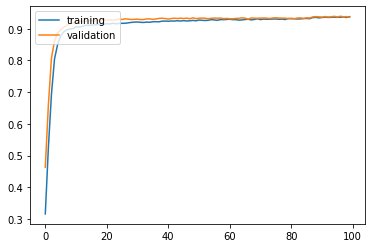

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [10]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 0s 601us/step - loss: 0.4262 - accuracy: 0.9404
[0.42615756392478943, 0.9404000043869019]
